<a href="https://colab.research.google.com/github/janakimeena/Python-for-Data-Science/blob/master/nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Models in Keras
There are two ways to build Keras models: 

1.   Sequential
2.   functional



## Sequential Model

Sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs

## Functional Model

Functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. 

You can connect layers to (literally) any other layer. 

As a result, creating complex networks such as siamese networks and residual networks become possible.

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
numpy.random.seed(7)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Description of Dataset
For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
root_path = 'gdrive/My Drive/NN Dataset'

Mounted at /content/gdrive


In [0]:
import pandas as pd
dataset = pd.read_csv(root_path+'/pima-indians-diabetes-data.csv',index_col=0)

In [0]:
dataset.head()

,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
num_pregnant,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [0]:
dataset.describe(include='all')

,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
#create a dataframe with all training data except the target column
X = dataset.drop(columns=['diabetes'])

#check that the target variable has been removed
X.head()

,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age
num_pregnant,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [0]:
#one-hot encode target column
#Converts a class vector (integers) to binary class matrix.
Y = to_categorical(dataset.diabetes)

Y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
# Split up the dataset into inputs and targets

(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.25, random_state=42)

In [0]:
print("Number of records in training set ",len(trainX), len(trainY))
print("Number of records in tesing set ",len(testX), len(testY))

Number of records in training set  576 576
Number of records in tesing set  192 192


In [0]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = X.shape[1]

print(n_cols)
#‘add()’ function to add layers to our model
# ‘Dense’ is the layer type. Dense is a standard layer type that works for most cases. 
# In a dense layer, all nodes in the previous layer connect to the nodes in the current layer.
model.add(Dense(12, activation='relu', input_shape=(n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax')) # softmax


7




In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


# Optimizer

To minimize the cost function by finding the optimized value for weights


To ensure that the algorithm generalizes well

Modfies learning rate to optimize

This will help make a better prediction for the data that was not seen before

Gradient descent is an iterative machine learning optimization algorithm to reduce the cost function

Types of Gradient Descent


1.   Batch Gradient Descent or Vanilla Gradient Descent
2.   Stochastic Gradient Descent
3.   Mini batch Gradient Descent

**Adam — Adaptive Moment Estimation**

Another method that calculates the individual adaptive learning rate for each parameter from estimates of first and second moments of the gradients.

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # binary_crossentropy



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Fit the model
H = model.fit(trainX, trainY, epochs=150, batch_size=10, validation_data=(testX, testY))




Train on 576 samples, validate on 192 samples
Epoch 1/150





576/576 [==============================] - 1s 2ms/step - loss: 1.0060 - acc: 0.6042 - val_loss: 0.9535 - val_acc: 0.6146
Epoch 2/150
576/576 [==============================] - 0s 141us/step - loss: 0.7727 - acc: 0.6233 - val_loss: 0.8032 - val_acc: 0.6354
Epoch 3/150
576/576 [==============================] - 0s 149us/step - loss: 0.6979 - acc: 0.6580 - val_loss: 0.7522 - val_acc: 0.6406
Epoch 4/150
576/576 [==============================] - 0s 143us/step - loss: 0.6323 - acc: 0.6563 - val_loss: 0.8207 - val_acc: 0.6719
Epoch 5/150
576/576 [==============================] - 0s 148us/step - loss: 0.6239 - acc: 0.6927 - val_loss: 0.7160 - val_acc: 0.6510
Epoch 6/150
576/576 [==============================] - 0s 157us/step - loss: 0.6067 - acc: 0.6997 - val_loss: 0.7014 - val_acc: 0.6458
Epoch 7/150
576/576 [==============================] - 0s 156us/step - loss: 0.6020 - acc: 0.6753 - val_loss: 0.7097 - val_acc: 0.6562
Epo

In [0]:
# evaluate the model : train
scores = model.evaluate(trainX, trainY)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


# evaluate the model : test
scores = model.evaluate(testX, testY)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

576/576 [==============================] - 0s 29us/step

acc: 79.69%
192/192 [==============================] - 0s 52us/step

acc: 72.92%


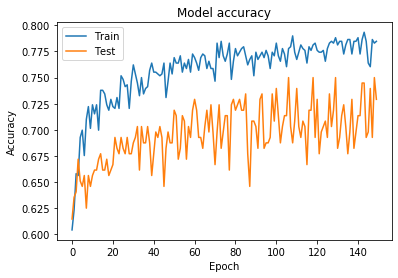

In [0]:
# Plot training & validation accuracy values
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

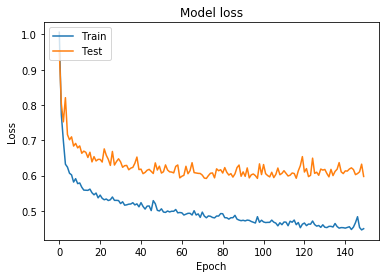

In [0]:
# Plot training & validation loss values
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded[1])

1.0
